In [119]:
#importing required libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [120]:
#creating datasets
X, y = make_classification(n_samples=150, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,class_sep=3)
X[:3,:]

array([[ 0.21820995,  2.5623628 ],
       [-1.45142603, -2.68932981],
       [-0.74073072, -3.27992461]])

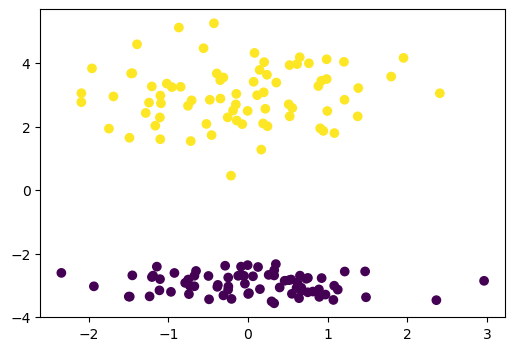

In [121]:
#visualise the data
plt.figure(figsize=(6,4))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [147]:
#gradient descent for logistic from scratch
def sigmoid(z):
    return 1/(1+np.exp(-z))

def logistic_ridge(X,y,learning_rate):
    
    X=np.insert(X,0,1,axis=1)  #x matrix with ones in first column and feautures in rest of column
    weights=np.ones(X.shape[1])
    
    for i in range(15000):
        y_hat=sigmoid(np.dot(X,weights))
        weights=weights + learning_rate*(np.dot((y-y_hat),X)/X.shape[0])
    return weights[0],weights[1:]

In [148]:
#lets try our model
intercept_,coef_=logistic_ridge(X,y,0.5)
print('intercept: ',intercept_)
print("Coefficient: ",coef_)

intercept:  2.250970729418577
Coefficient:  [0.06929146 4.67780121]


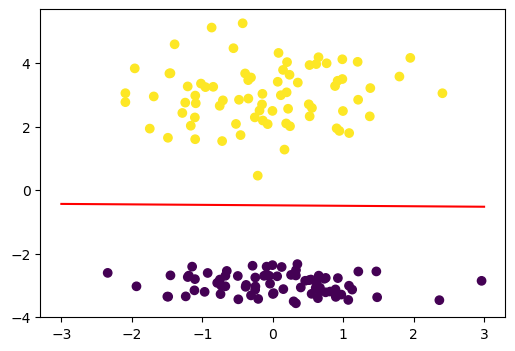

In [149]:
#lets plot straight line z using estimated coeficnt

x_axis=np.linspace(-3,3,X.shape[0])
y_axis=-(intercept_/coef_[1])-((coef_[0]/coef_[1])*x_axis)

plt.figure(figsize=(6,4))
plt.plot(x_axis,y_axis,color='red')
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [150]:
#lets try sklearn logistic regression model

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='none',solver='sag')
lr.fit(X,y)

C:\Users\shraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\shraj\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [151]:
print(lr.coef_)
print(lr.intercept_)

[[-0.05778809  4.0609576 ]]
[1.39818493]


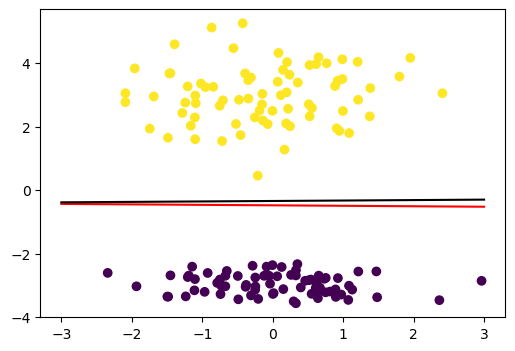

In [152]:
b_intercept=-(lr.intercept_/lr.coef_[0][1])
m_slope=-(lr.coef_[0][0]/lr.coef_[0][1])
x_axis_lr=np.linspace(-3,3,X.shape[0])
y_axis_lr=b_intercept+m_slope*x_axis_lr


plt.figure(figsize=(6,4))
plt.plot(x_axis,y_axis,color='red')
plt.plot(x_axis_lr,y_axis_lr,color='black')
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()